<a href="https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/2_%C3%81rbol_de_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

[Volver al índice](https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/%C3%8Dndice.ipynb)

# Introducción

Nuestros datos representan el conjunto de datos medidos por los 8 sensores del producto "[MYO armband](https://www.youtube.com/watch?v=jOEcsNmTk7g)"


Se trata de 8 sensores que individualmente miden los mismos músculos 8 veces en intervalos de 5 ms. Cada sensor recoge los grados en los que se encuentra girado el músculo esquelético. Este valor varía en un rango entre **[-128º,127º]** cada fila recoge 40ms de estas mediciones, por lo tanto, cada fila recoge 8 mediciones consecutivas de los 8 sensores, de forma que el formato de cada fila es la siguiente:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores]​

Es decir, tenemos 64 predictores y una última variable que es la clase o el atributo a predecir. Según los valores de las 8 mediciones consecutivas de los 8 sensores sobre el musculo, se clasificará en una de las 4 gestos posibles identificados de la siguiente forma:
```c#
Enum {
  Roca = 0,
  Tijeras = 1,
  Papel = 2,
  Ok = 3
}
```
Esta clase corresponde con el tipo de gesto realizándose en posición fija en un lapso de tiempo de duración 40 ms.

Por lo tanto, el formato final de nuestro conjunto de datos es:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][Gesto]​

Esto es cada fila. Nuestro conjunto de datos son 11678 filas. 

# Objetivo

Crear y entrenar un clasificador preciso capaz de diferenciar y reconocer los gestos ejecutados con un margen de error de +/- 5%​. En este cuaderno, probaremos la efectividad del árbol de clasificación como clasificador de nuestros gestos.

# Carga de librerías

De momento, para selección y filtrado de nuestros datos, vamos a cargar la siguiente librería:
*   **caret:** contiene funciones para entrenar y dibujar modelos de clasificación y regresión. De esta librería Usaremos la función *confusionMatrix* para obtener la matriz de confusión.
*   **dplyr:** contiene funciones para la manipulación de datos tales como filtrado por filas, selección de columnas, reordenación de filas...


In [0]:
if (!requireNamespace("caret"))
  install.packages("caret")
library(caret)
if (!requireNamespace("dplyr"))
  install.packages("dplyr")
library(dplyr)


Loading required namespace: caret

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Carga y visualización de datos

Empezamos cargando nuestro datasheet a memoria . Este datasheet ha sido sacado de la pagina "Kaggle" y puede encontrarse en el siguiente enlace:

https://www.kaggle.com/kyr7plus/emg-4

El datasheet que se carga es el producto de unir los 4 conjuntos de datos (cada uno por cada tipo de gesto) en uno solo.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.42838349,0.40170696,1.15012947,1.1730891,-0.04710804,-0.48219055,-4.293642,-4.24028809,-0.45983856,0.22415026,⋯,-1.7855609,3.3968017,0.39488063,1.7644141,0.7726201,0.2324183,-0.2592921,-2.2783569,1.0694782,0
2,-2.50338498,-0.44813614,-0.85390090,-0.8425861,0.73718804,-0.01724597,1.445703,-0.60602378,0.58850359,-0.28255256,⋯,-1.5876586,2.6277596,0.56147502,1.3619800,0.7726201,0.7368608,0.8365519,4.4517214,1.0050871,0
3,-0.99530940,-0.61810475,-1.45511001,-0.9769644,-1.16753100,-0.21097288,-3.097945,0.82172292,0.03674456,0.47750168,⋯,-5.4137702,0.4304965,0.64477221,0.3558947,-0.9878456,0.4005658,0.8365519,4.5704875,3.1299941,0
4,0.13574728,0.31672265,0.14811428,0.3668191,0.00891311,0.87389779,4.275519,-0.86561409,-0.84606988,-0.11365162,⋯,-2.4452353,-0.5582719,0.39488063,1.5631970,1.5851427,1.8578441,1.5410231,4.7684310,2.8080385,0
5,0.35118665,0.06176972,0.14811428,-0.1706943,-0.77538297,0.40895322,-1.981961,0.36743988,0.42297588,0.05524932,⋯,2.5682902,-1.8766298,-0.60468571,0.5571117,0.9080405,-0.7204175,-0.9246259,-4.3765578,-4.4037671,0
6,0.83592523,-0.36315183,-0.85390090,-1.9176128,0.68116689,-0.83089898,-1.463826,2.37926477,0.53332768,0.56195215,⋯,-1.6536260,0.3206333,0.56147502,1.3619800,1.5851427,0.2884675,1.1887875,-1.8428813,1.6489983,0
7,-0.61829051,-0.36315183,-0.05228875,0.6355757,-0.88742526,-0.63717207,-2.699379,-0.99540924,-0.62536627,-0.19810209,⋯,0.1274949,-1.9315614,-0.77128010,-2.2599270,-2.0712090,-0.6643683,-1.8247835,0.2949083,-1.8925134,0
8,2.34400081,0.06176972,-0.25269179,0.9043324,0.62514574,1.02887931,2.083408,1.79518657,-0.45983856,-0.11365162,⋯,2.7661925,0.8699491,0.39488063,2.1668482,3.4810288,0.5126641,0.5234537,2.9473510,3.0656030,0
9,-1.80320704,0.31672265,1.95174161,3.9950344,0.34504000,-0.94713512,-4.891490,-0.02194558,0.69885539,-0.45145350,⋯,-0.3342772,2.2981702,0.06169185,-1.8574929,-2.2066295,1.1852541,0.1320808,1.7201014,0.7475226,0


       V1                  V2                 V3                  V4          
 Min.   :-5.411816   Min.   :-8.77660   Min.   :-6.465186   Min.   :-8.63653  
 1st Qu.:-0.456711   1st Qu.:-0.27817   1st Qu.:-0.453095   1st Qu.:-0.43945  
 Median :-0.025832   Median :-0.02321   Median :-0.052289   Median :-0.03632  
 Mean   :-0.000584   Mean   :-0.00182   Mean   : 0.005197   Mean   : 0.01625  
 3rd Qu.: 0.351187   3rd Qu.: 0.31672   3rd Qu.: 0.548920   3rd Qu.: 0.36682  
 Max.   : 6.006470   Max.   : 7.28544   Max.   : 6.160205   Max.   : 5.74195  
       V5                  V6                 V7                 V8          
 Min.   :-5.593202   Min.   :-4.39547   Min.   :-5.05092   Min.   :-8.26394  
 1st Qu.:-0.551298   1st Qu.:-0.52094   1st Qu.:-0.14856   1st Qu.:-0.41133  
 Median : 0.008913   Median :-0.01725   Median : 0.01087   Median :-0.02195  
 Mean   :-0.002763   Mean   :-0.00144   Mean   : 0.01616   Mean   : 0.01074  
 3rd Qu.: 0.569125   3rd Qu.: 0.52519   3rd Qu.: 0.17029 

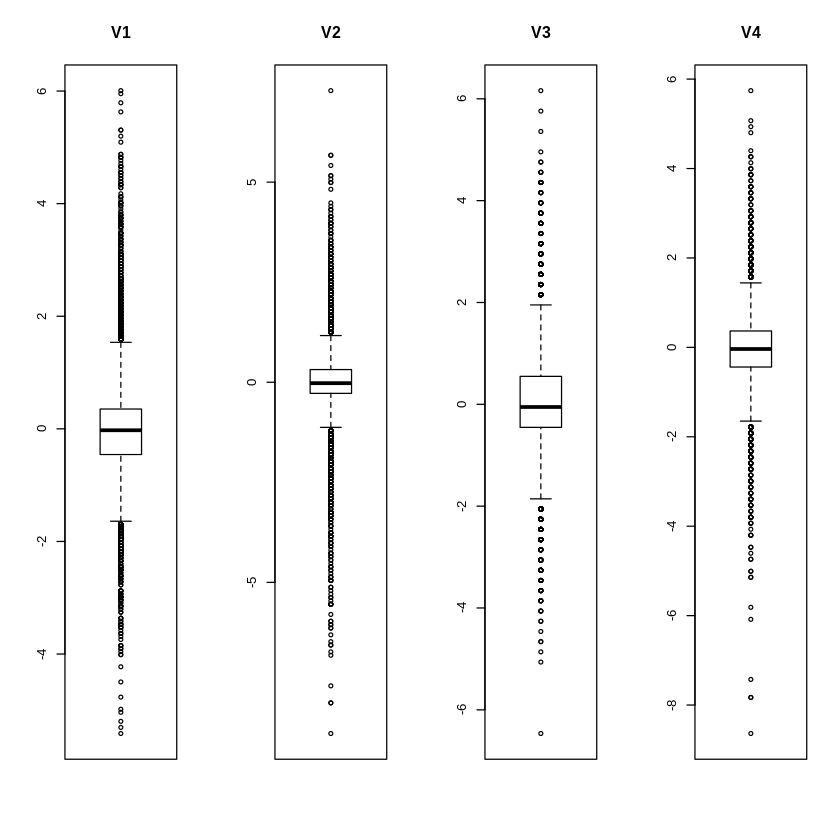

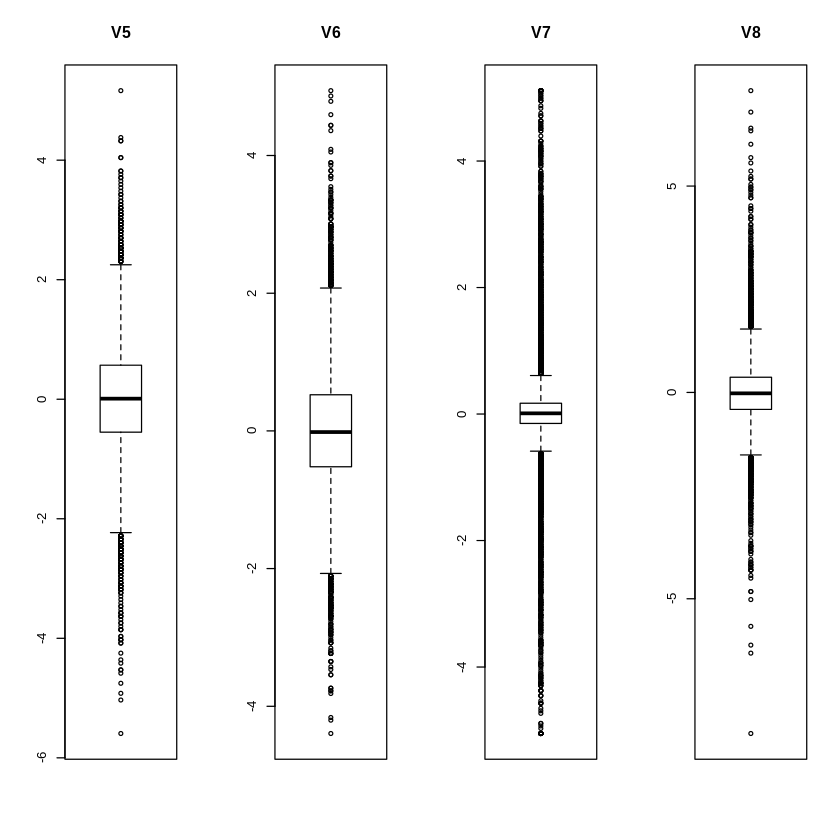

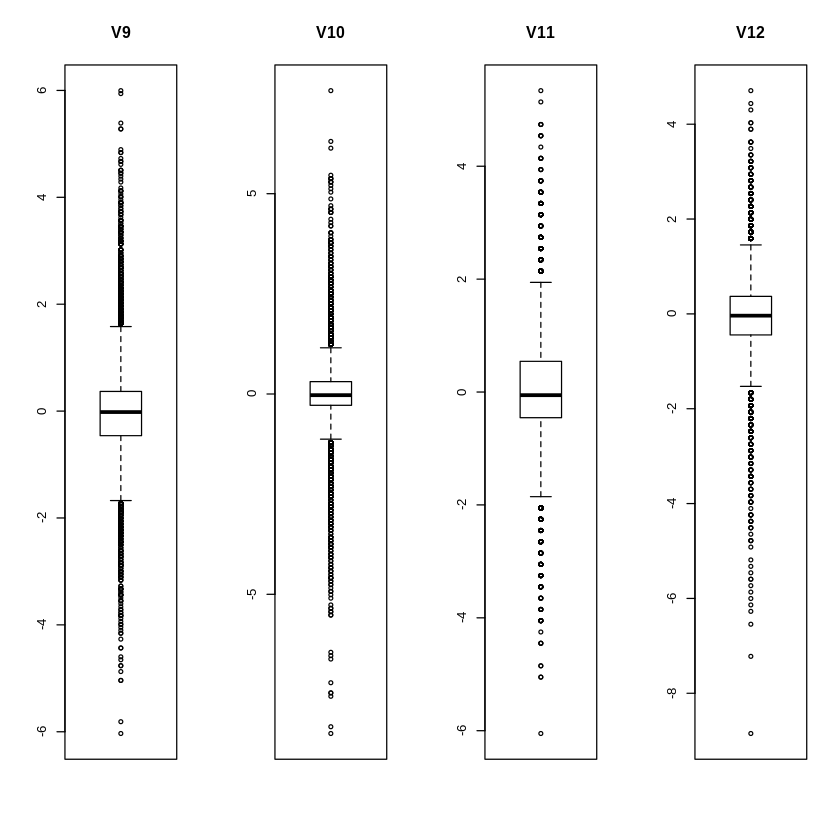

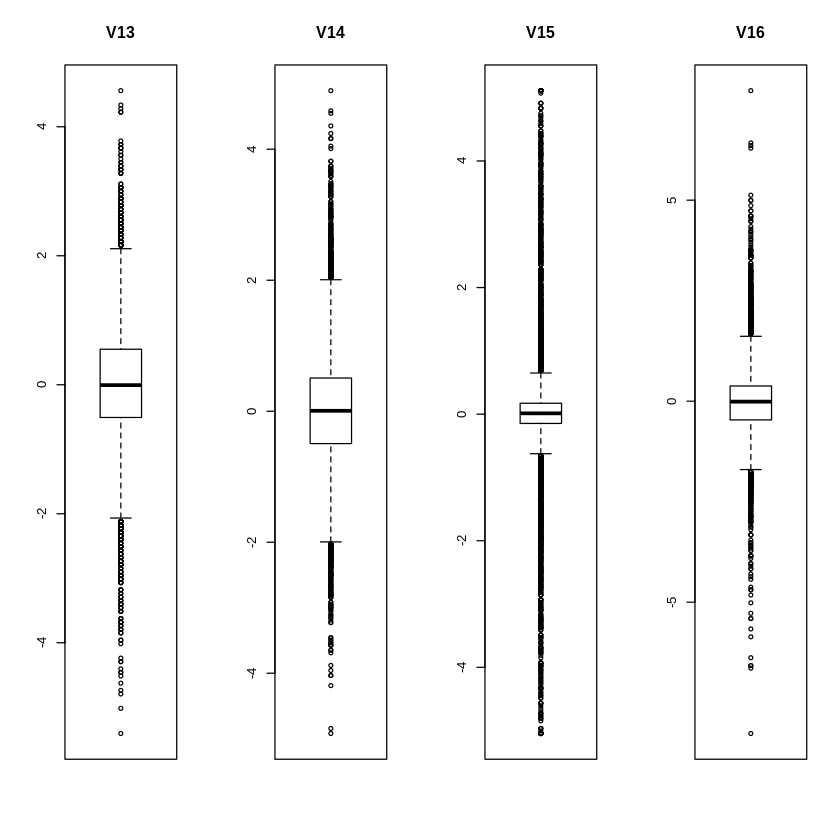

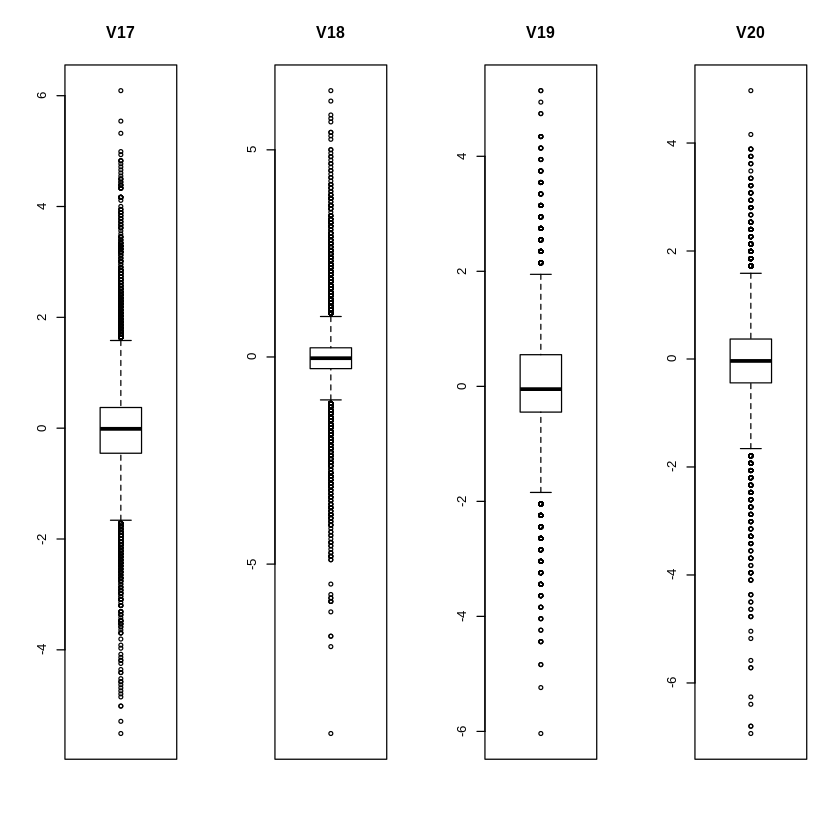

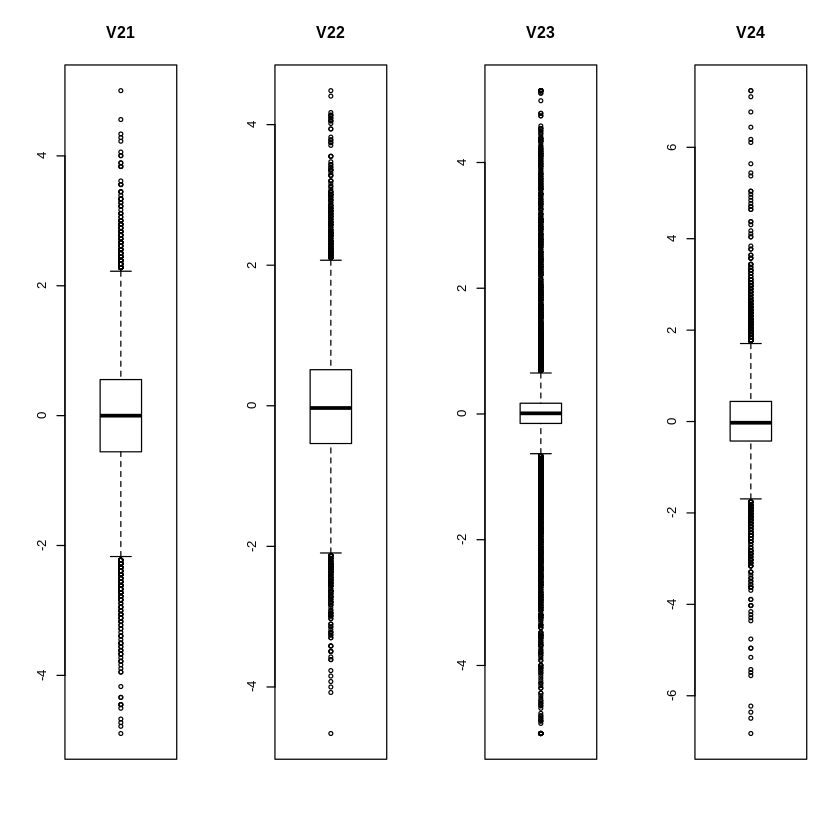

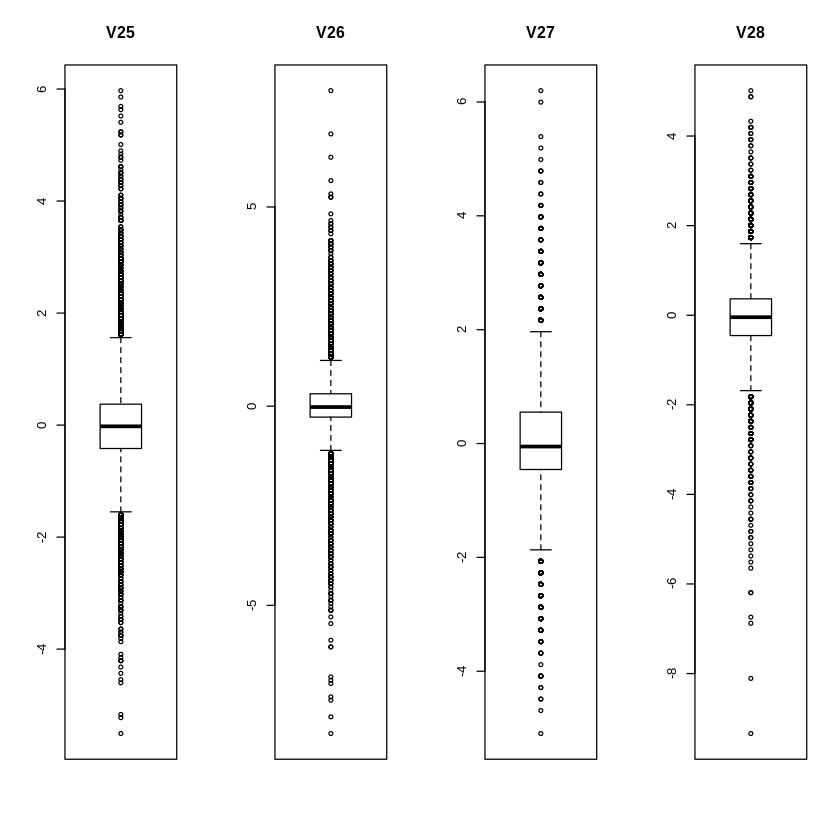

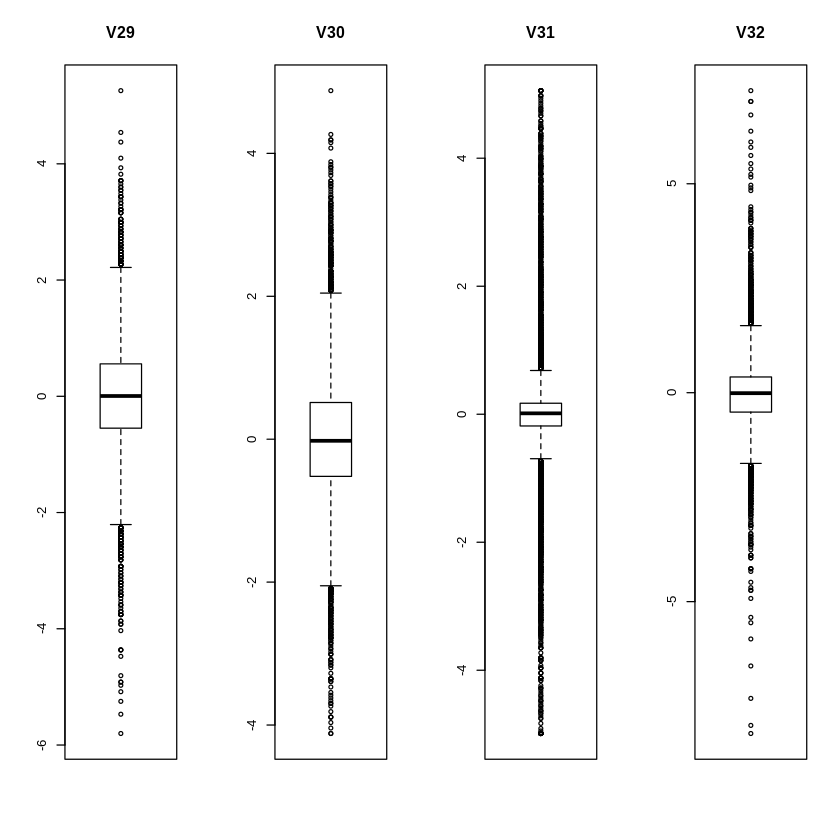

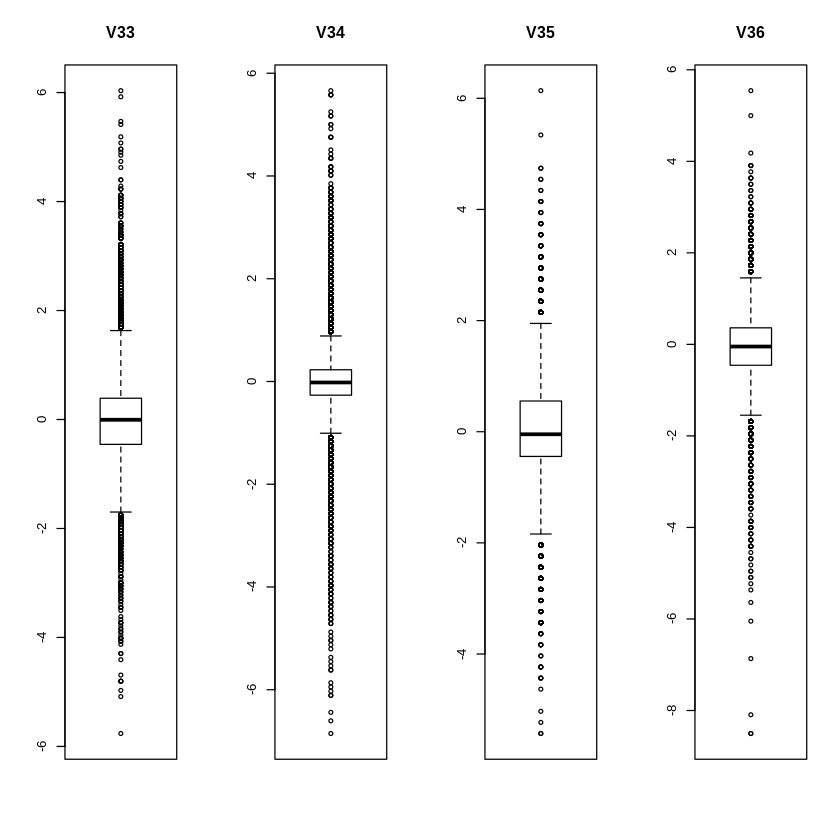

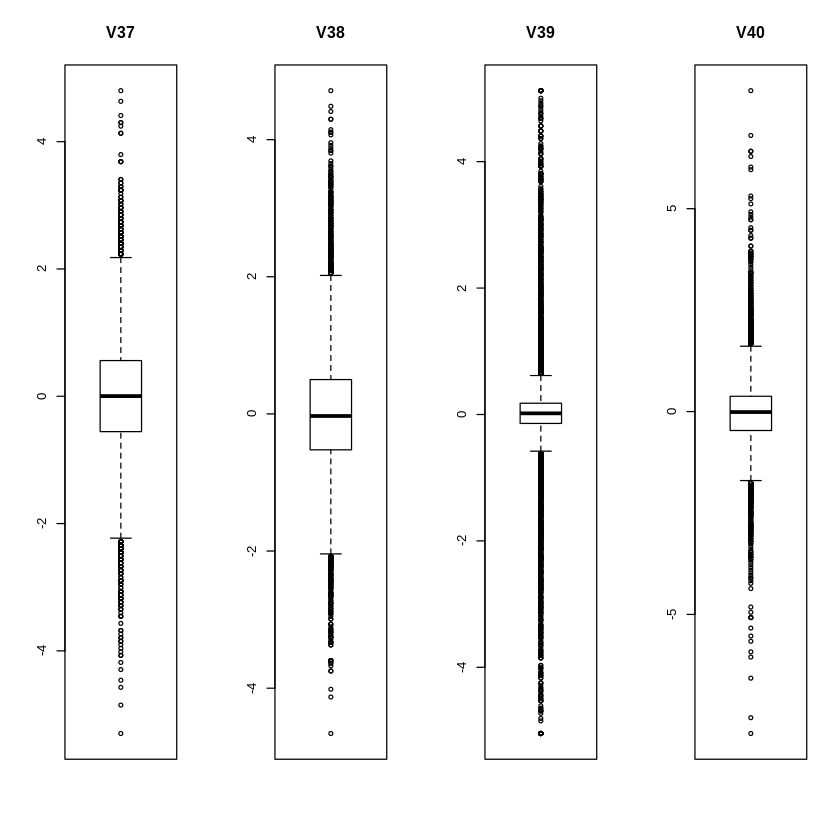

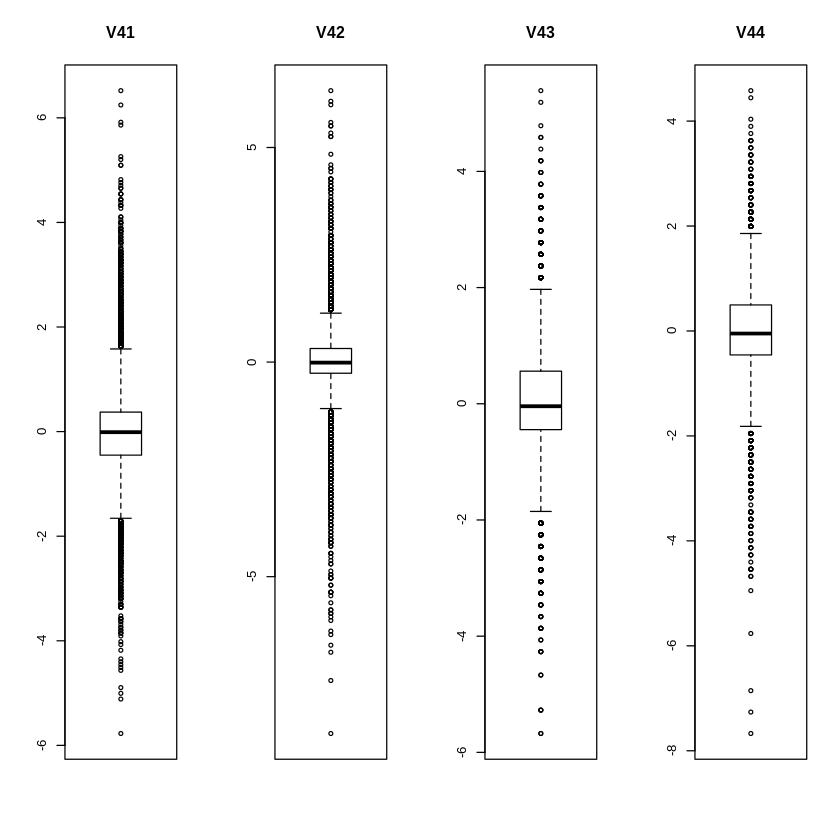

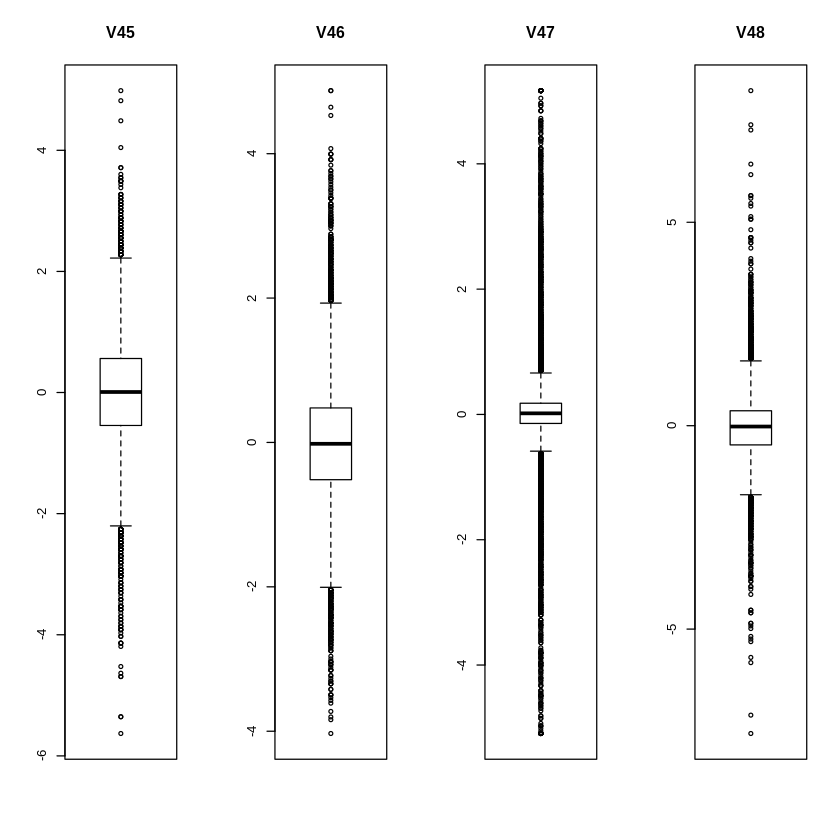

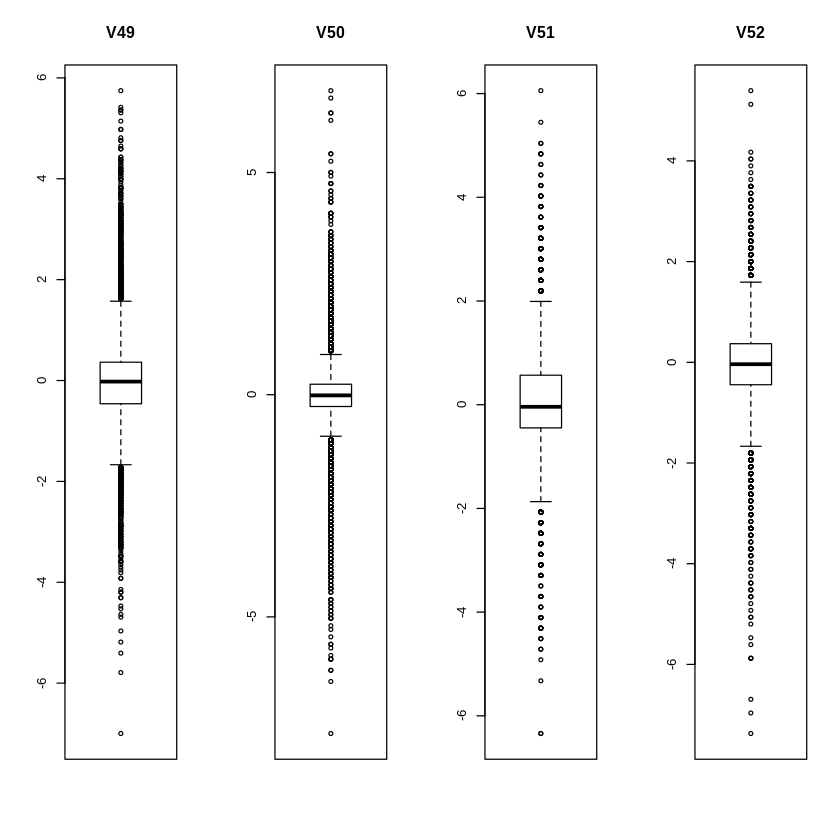

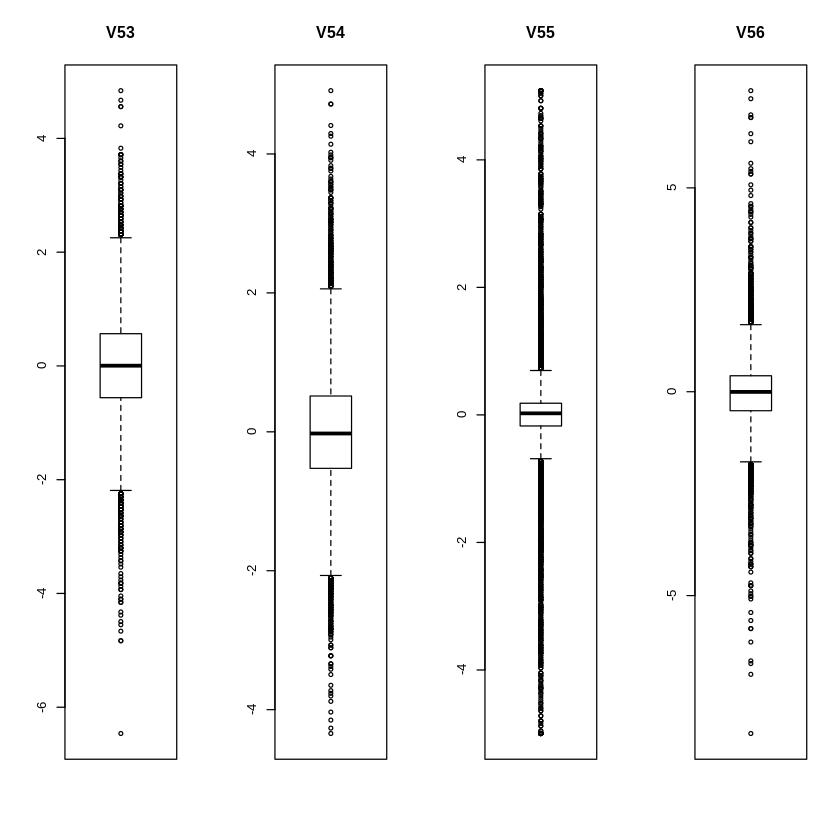

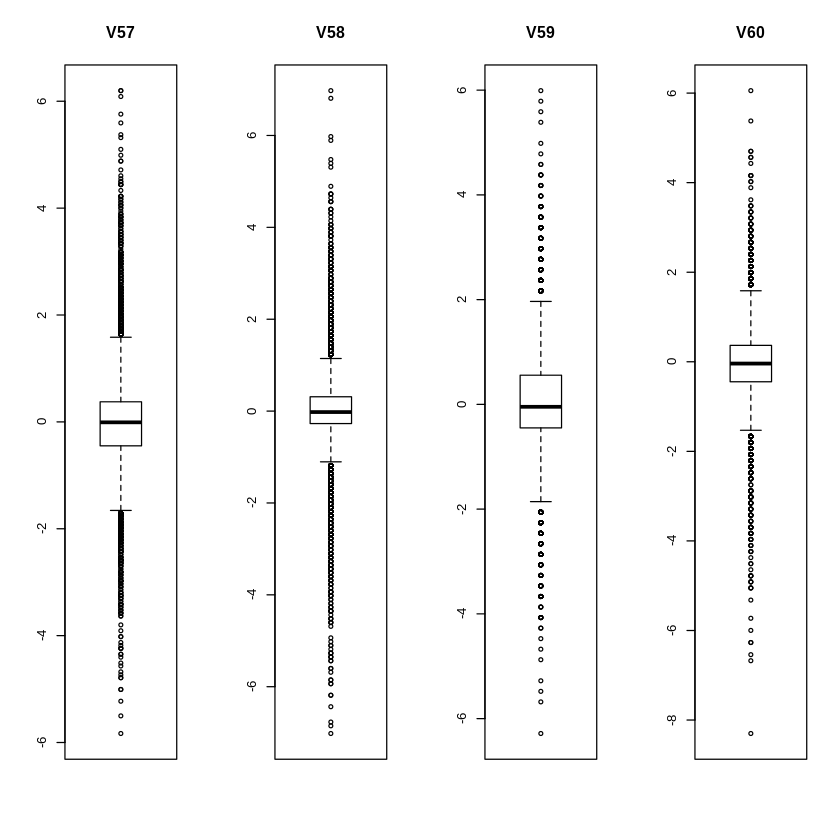

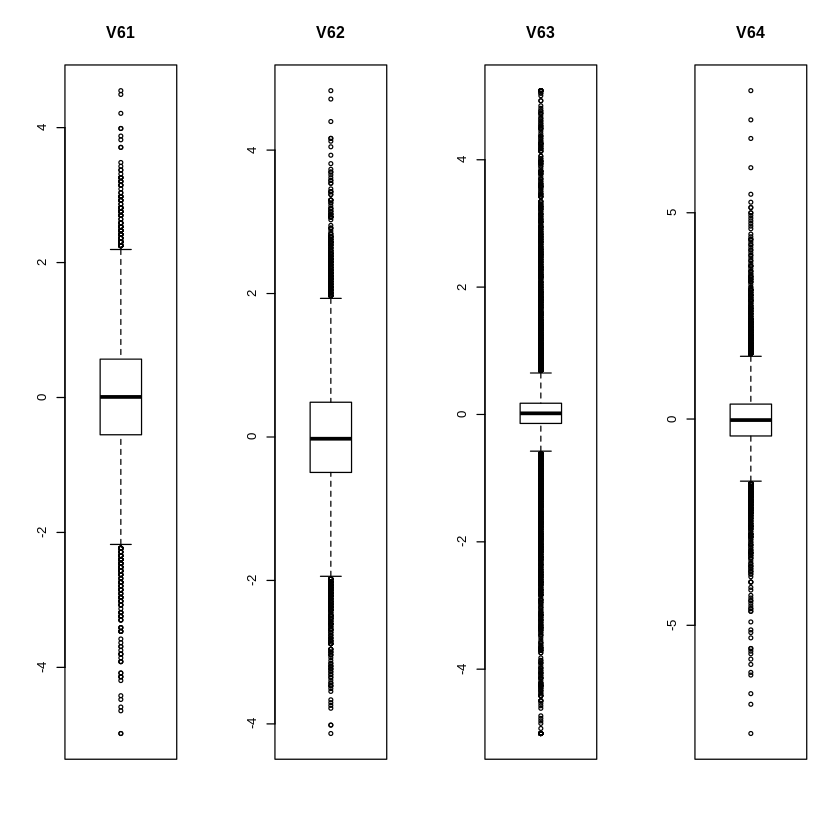

In [0]:
#Cargamos nuestros datos
#data = read.csv("/content/all.csv",header=FALSE, sep=",")
#data = read.csv("https://uc36943bfd09a58be3b54c0ce836.dl.dropboxusercontent.com/cd/0/get/A4R6OXi1GuzkFsDQE41Vj1vo8nvN3gCH8OnA41L9RZdmTUZZSz4sb7MCkkpfc1SyR9V27bcczlCjvpBJDLukItZXb1kPtwTT4PwGwNaCEL1i4ytv9tiHrGZSXI10waPGzIc/file#", header=FALSE, sep = ",")
data = read.csv("/content/cleanedAll.csv",header=FALSE, sep=",")
head(data, 10)

data$V65 <- as.factor(data$V65)
summary(data)

par(mfrow=c(1,4))
for(i in 1:64) {
  boxplot(data[,i], main=names(data)[i])
}


#Preprocesamiento de datos

Ya hicimos un preprocesado de datos , pero todavía faltaría dividir nuestros datos en 2 conjuntos, uno de entrenamiento y otro de validación, de forma que el primero sirva para crear el modelo y el segundo pueda servir para probar el modelo frente al mundo real, detectando la precisión del modelo o el posible sobreajuste de este.

In [0]:
set.seed(56)
data.entrenamiento <- sample_frac(data, 0.5) #Bajado de 0.7 a 0.5 para evitar sobreajustes
data.validacion <- setdiff(data, data.entrenamiento)

#Ejecutamos un upperSample en conjunto de entrenamiento para balancear clases
print("Antes de balanceo upperSample :")
summary(data.entrenamiento$V65)
data.entrenamiento <- upSample(data.entrenamiento, data.entrenamiento$V65)
print("Despues de balanceo upperSample :")
summary(data.entrenamiento$V65)




[1] "Antes de balanceo upperSample :"


0    1    2    3 
1315 1330 1389 1194

[1] "Despues de balanceo upperSample :"


0    1    2    3 
1389 1389 1389 1389

# **Análisis** Obtención del arbol de clasificación

Vamos a obtener nuestro árbol de clasificación. Antes de ello, cargamos las librerias necesarias:

*   **rpart:** contiene las implementaciones de los árboles de clasificación que se usarán
*   **rpart.plot:** contiene funciones para representar de árboles de clasificación

In [0]:
if (!requireNamespace("rpart"))
  install.packages("rpart")
library(rpart)

if (!requireNamespace("datasets"))
  install.packages("datasets")
library(datasets)

if (!requireNamespace("rpart.plot"))
  install.packages("rpart.plot")
library(rpart.plot)

Loading required namespace: rpart.plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Ahora obtenemos nuestro árbol de clasificación. Conviene destacar que lo que se obtiene es un árbol de clasificación porque se intenta predecir una variable no continua, es decir, una **variable discreta**. Si el modelo intentase predecir una **variable continua**, se trataría de un **árbol de regresión**

In [0]:
data.tree <- rpart(V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64, 
                  data.entrenamiento, 
                  method = "class")

Mostramos nuestro **arbol de clasificación** procesado:

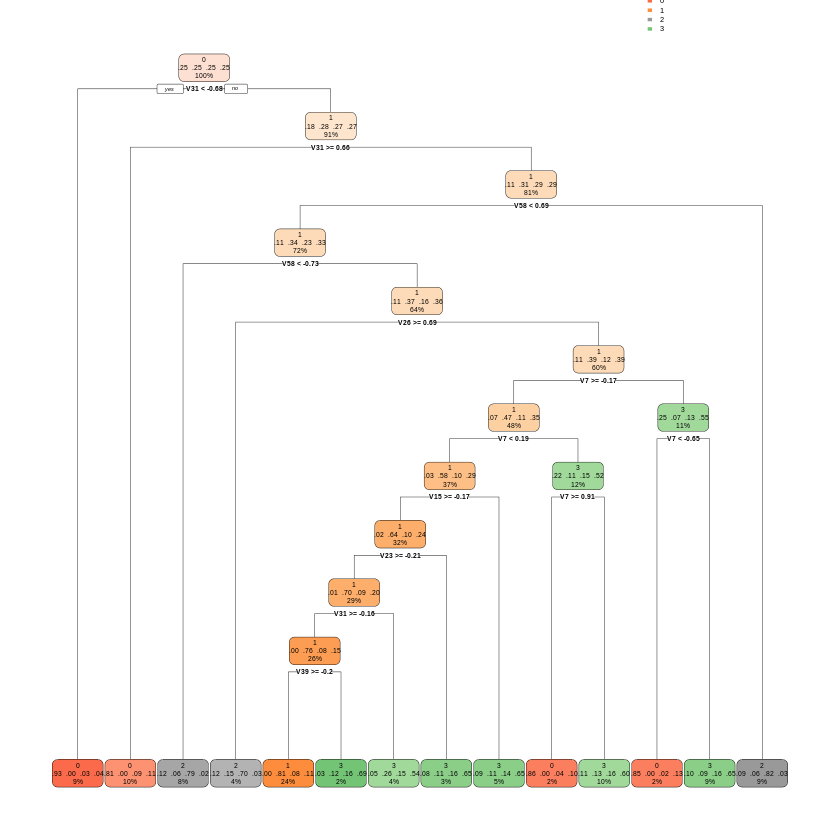

In [0]:
#prp(data.tree)
rpart.plot(data.tree)
#prp(data.tree, type = 2, extra ="auto", nn = TRUE, branch = 1, varlen = 0, yesno = 2) #Mejor pero se ve pequeño

Examinamos la complejidad del árbol generado así como su precisión (más bien su % de error) frente al conjunto de entrenamiento para cada nivel del árbol, así como las variables utilizadas en el árbol (de forma que las que no aparecen han sido descartadas) 

In [0]:
printcp(data.tree)


Classification tree:
rpart(formula = V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + 
    V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + 
    V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + 
    V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + 
    V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + 
    V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + 
    V59 + V60 + V61 + V62 + V63 + V64, data = data.entrenamiento, 
    method = "class")

Variables actually used in tree construction:
[1] V15 V23 V26 V31 V39 V58 V7 

Root node error: 4167/5556 = 0.75

n= 5556 

         CP nsplit rel error  xerror      xstd
1  0.115431      0   1.00000 1.03072 0.0074926
2  0.102232      1   0.88457 0.89801 0.0083881
3  0.094552      2   0.78234 0.86681 0.0085313
4  0.076554      3   0.68778 0.70434 0.0089296
5  0.052076      4   0.61123 0.60667 0.0089076
6  0.033117      7   0.44324 0.47324 0.0085592
7  0.022078      8   0.41013 0.44684 0.0084437
8

# **Evaluación**

¿Es bueno el modelo? Comprobémoslo mediante el procesamiento de la matriz de confusión asociada al modelo. Cargamos dependencias y calculamos precisión.

In [0]:
if (!requireNamespace("e1071"))
  install.packages("e1071")
library(e1071)

Loading required namespace: e1071

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
data.prediccion <- predict(data.tree, newdata = data.validacion, type = "class")
data.validacion$V65
confusion <- confusionMatrix(data.prediccion, data.validacion$V65) 
print(confusion)


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1370] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1407] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1444] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1481] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1518] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1555] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1592] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1629] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1666] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1703] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1740] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1777] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1814] 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3
         0 1005    1   65   76
         1    4 1070   92  197
         2  149   87  919   33
         3  146  204  293  886

Overall Statistics
                                          
               Accuracy : 0.7423          
                 95% CI : (0.7302, 0.7541)
    No Information Rate : 0.2619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6569          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            0.7707   0.7856   0.6713   0.7433
Specificity            0.9638   0.9242   0.9303   0.8406
Pos Pred Value         0.8762   0.7850   0.7736   0.5795
Neg Pred Value         0.9267   0.9244   0.8886   0.9173
Prevalence             0.2495   0.2606   0.2619   0.2280
Detection Rate      

Obtenemos una precisión del 0.74 para nuestro primer modelo. Una precisión notable que, dado el problema que estamos tratando, haría nuestro detector de gestos funcionar la mayoría de veces bien pero con una frecuencia de errores suficientemente alta para ser perceptible y problemático

# **Análisis** Optimización árbol de clasificación



Para la optimización de nuestro árbol de clasificación vamos a usar la técnica de **postpruning**. Esto es, obtener el árbol de máxima profundidad y ejecutar las podas que maximicen la precisión del modelo. Para obtener el árbol con la máxima profundidad posible ejecutamos rpart pero con un argumento más. 

In [0]:
hr_base_model <- rpart(V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64, 
                  data.entrenamiento, 
                  method = "class",
                  control = rpart.control(cp = 0)) #<--- Nuevo argumento

Lo visualizamos para asegurarnos de que hemos obtenido lo esperado

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


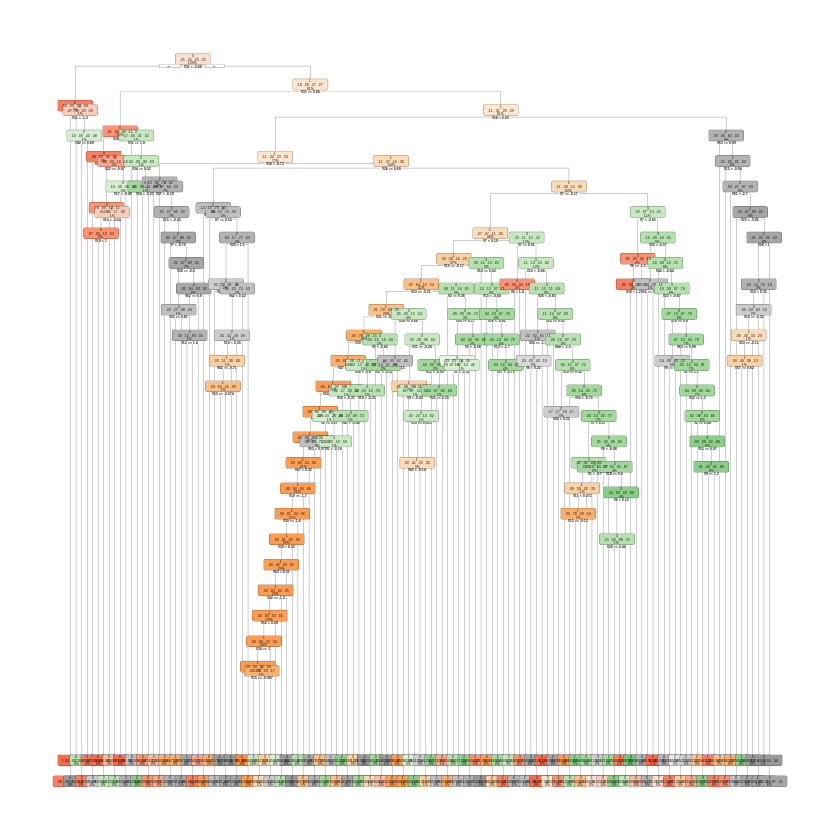

In [0]:
rpart.plot(hr_base_model)


Podemos ver la complejidad del árbol así como el % de error relativo frente al conjunto de entrenamiento ejecutando *printcp* (cp == complexity plot):

In [0]:
printcp(hr_base_model)


Classification tree:
rpart(formula = V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + 
    V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + 
    V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + 
    V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + 
    V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + 
    V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + 
    V59 + V60 + V61 + V62 + V63 + V64, data = data.entrenamiento, 
    method = "class", control = rpart.control(cp = 0))

Variables actually used in tree construction:
 [1] V1  V10 V12 V13 V15 V17 V18 V19 V2  V20 V22 V23 V25 V26 V30 V31 V32 V34 V38
[20] V39 V41 V42 V43 V44 V47 V49 V50 V52 V55 V57 V58 V6  V61 V62 V63 V7  V8  V9 

Root node error: 4167/5556 = 0.75

n= 5556 

           CP nsplit rel error  xerror      xstd
1  0.11543077      0   1.00000 1.02616 0.0075322
2  0.10223182      1   0.88457 0.89441 0.0084059
3  0.09455244      2   0.78234 0.86393 0.0085434
4  0.07655388     

Lo anterior puede verse de forma gráfica

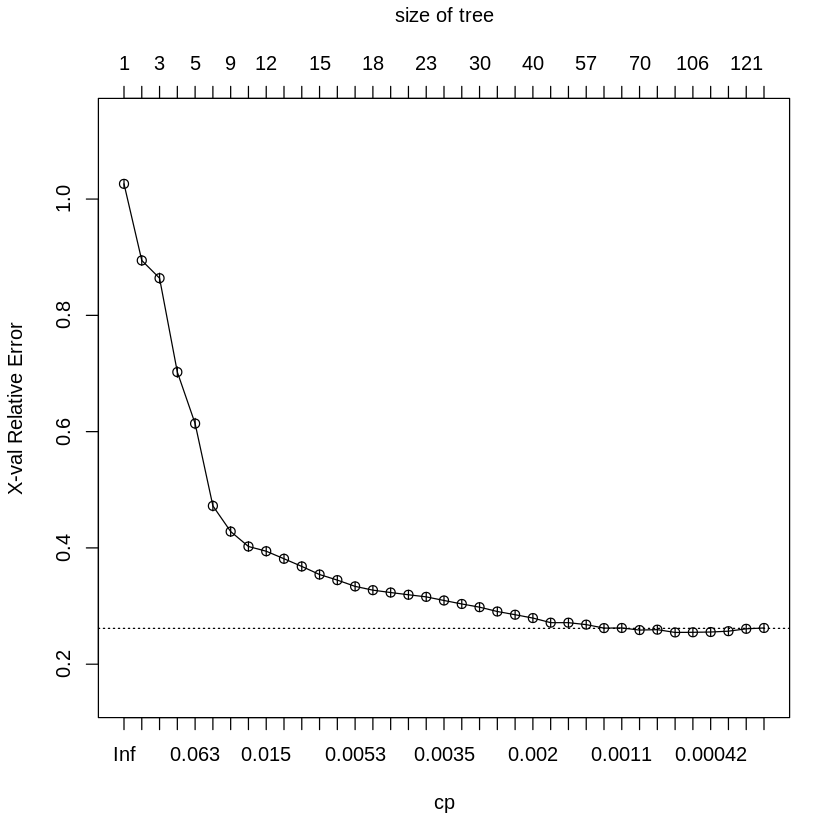

In [0]:
plotcp(hr_base_model)

Por lo general, podemos observar que el algoritmo rplot ya ejecuta una poda, pues de un conjunto con 64 variables, solo selecciona 38. Eso es asi porque, **rpart**, por defecto, aplica un proceso para calcular la penalización de acuerdo al número de árboles.

Ahora vamos a ejecutar la técnica de **PREPRUNING**. Esto es, añadirle nuevas ramas al árbol original.

Para ello definimos en *rpart.control*:
  - maxdepth = 30 (tamaño máximo del árbol dadas 64 variables)
  - minsplit = 1 (el min número de nodos que una rama debe tener para no ser descartada)

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


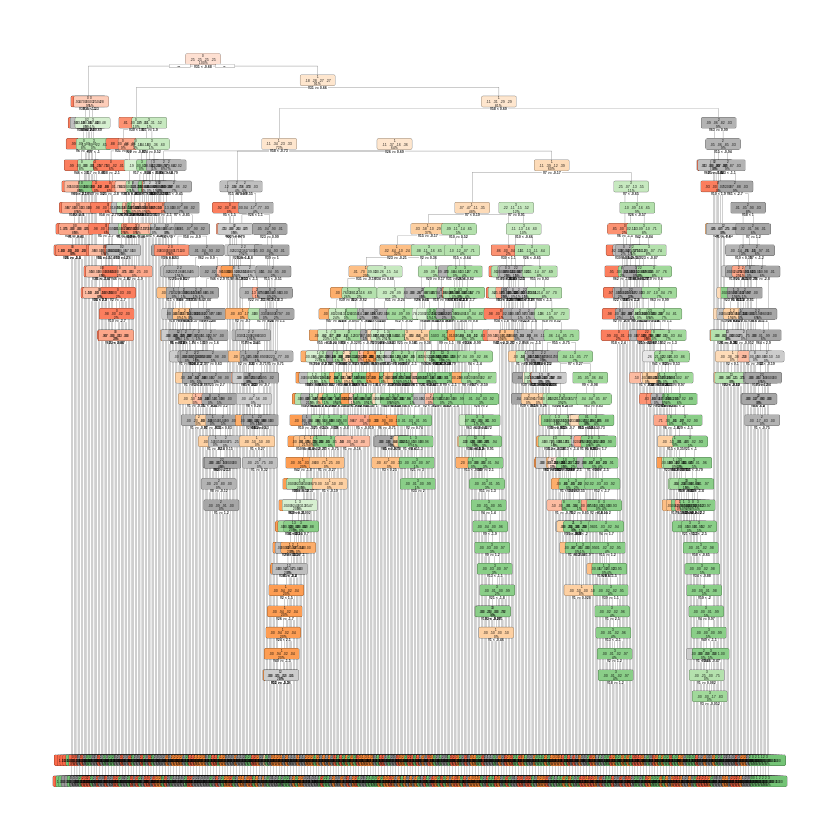


Classification tree:
rpart(formula = V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + 
    V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + 
    V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + 
    V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + 
    V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + 
    V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + 
    V59 + V60 + V61 + V62 + V63 + V64, data = data.entrenamiento, 
    method = "class", control = rpart.control(cp = 0, maxdepth = 30, 
        minsplit = 1))

Variables actually used in tree construction:
 [1] V1  V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V2  V20 V21 V22 V23 V24 V25 V26
[20] V28 V29 V3  V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V4  V40 V41 V42 V43 V44
[39] V45 V46 V47 V49 V5  V50 V51 V52 V53 V54 V55 V57 V58 V59 V6  V60 V61 V62 V63
[58] V64 V7  V8  V9 

Root node error: 4167/5556 = 0.75

n= 5556 

           CP nsplit rel error  xerror      xstd
1  0.11543077      0  1.0

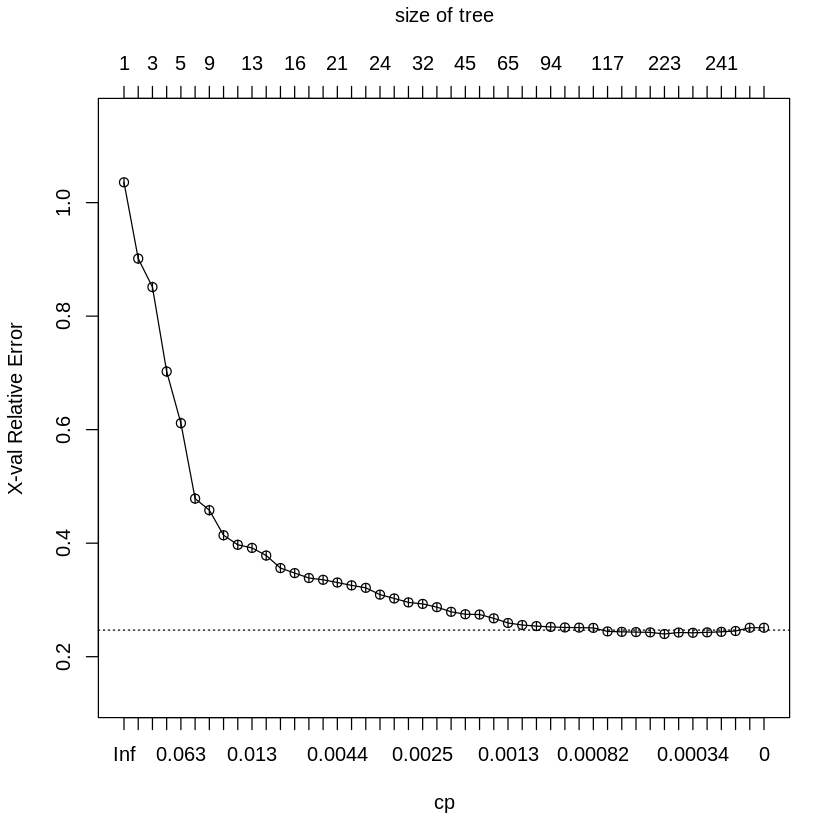

In [0]:
test <- data.validacion
# Compute the accuracy of the pruned tree
test$pred <- predict(hr_base_model, newdata= test, type = "class")
base_accuracy <- mean(test$pred == test$V65)


# Grow a tree with minsplit of 100 and max depth of 8 (PREPRUNING)
hr_model_preprun <- rpart(V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64, 
                    data = data.entrenamiento, method = "class", 
                    control = rpart.control(cp = 0, maxdepth = 30,minsplit = 1))
# Compute the accuracy of the pruned tree
test$pred <- predict(hr_model_preprun, test, type = "class")
accuracy_preprun <- mean(test$pred == test$V65)

rpart.plot(hr_model_preprun)
plotcp(hr_model_preprun)
printcp(hr_model_preprun)

Una vez lo ejecutamos, hacemos el siguiente paso, nombrado anteriormente **POSTPRUNING**. Esto es:
- Seleccionamos el valor óptimo de *cp* (seleccionado por la linea de puntos en la gráfica) y ese valor se lo pasamos al metodo *prune* que hace exactamente eso, podar hasta un valor cp  pasado (este caso, =0.00095992 ) 

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


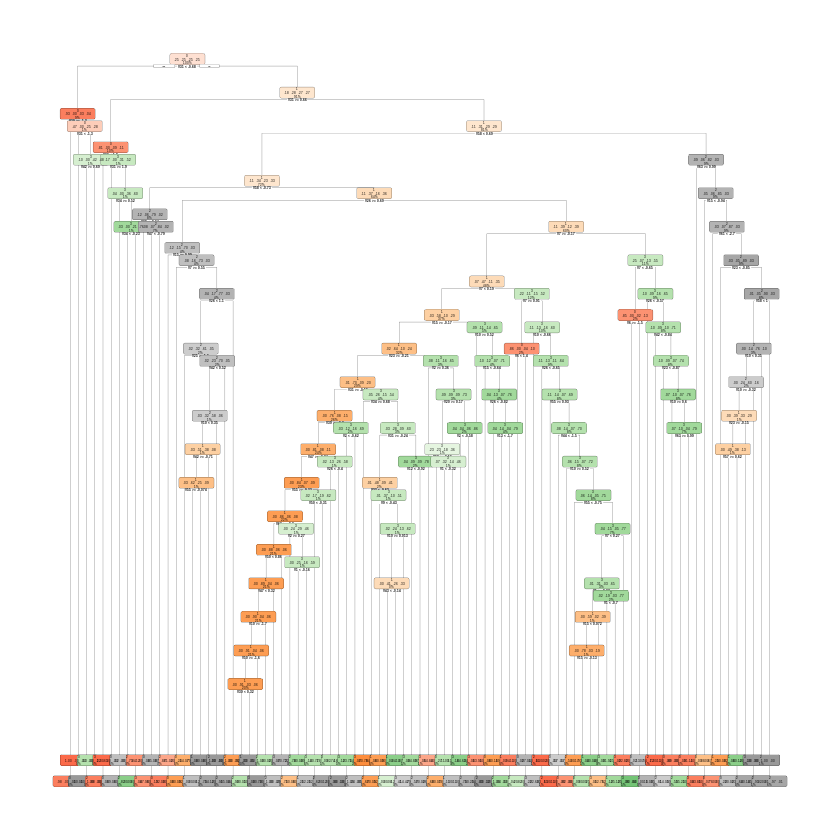


Classification tree:
rpart(formula = V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + 
    V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + 
    V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + 
    V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + 
    V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + 
    V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + 
    V59 + V60 + V61 + V62 + V63 + V64, data = data.entrenamiento, 
    method = "class", control = rpart.control(cp = 0))

Variables actually used in tree construction:
 [1] V1  V10 V12 V13 V15 V2  V20 V23 V25 V26 V30 V31 V32 V34 V39 V42 V43 V44 V47
[20] V50 V55 V57 V58 V6  V61 V63 V7  V9 

Root node error: 4167/5556 = 0.75

n= 5556 

           CP nsplit rel error  xerror      xstd
1  0.11543077      0   1.00000 1.02616 0.0075322
2  0.10223182      1   0.88457 0.89441 0.0084059
3  0.09455244      2   0.78234 0.86393 0.0085434
4  0.07655388      3   0.68778 0.70242 0.0089310
5  0.0520

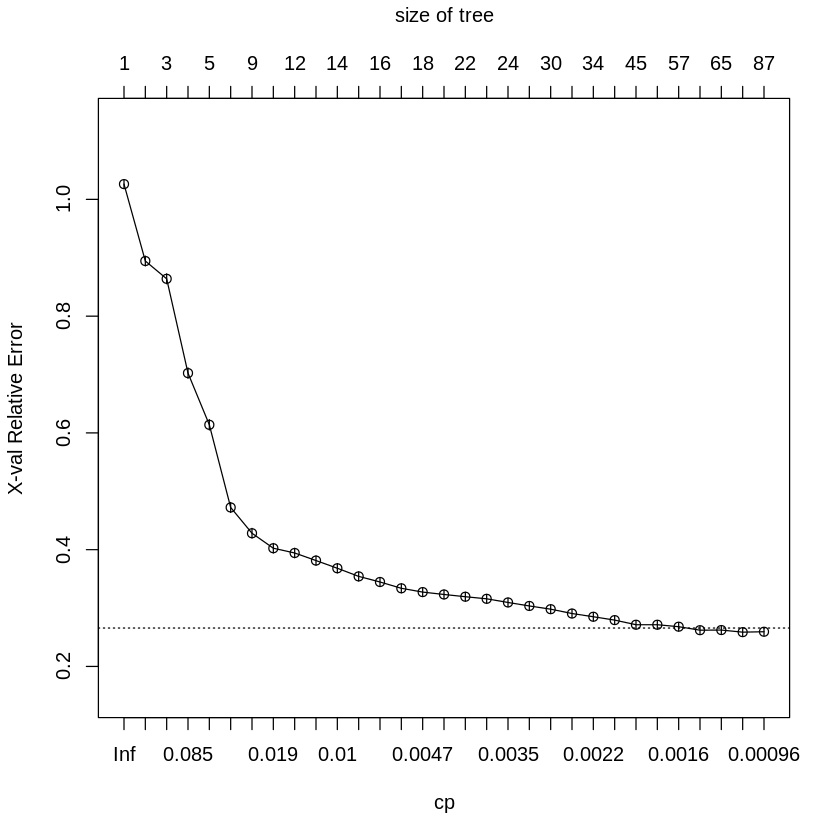

In [0]:
#Postpruning
# Prune the hr_base_model based on the optimal cp value (POSTPRUNING)
hr_model_pruned <- prune(hr_base_model, cp =0.00095992) #<- Sustituir cp por el valor optimo señalado en grafica generado con "plotcp" (señalado con linea de puntos)
# Compute the accuracy of the pruned tree
test$pred <- predict(hr_model_pruned, test, type = "class")
accuracy_postprun <- mean(test$pred ==test$V65)

rpart.plot(hr_model_pruned)
plotcp(hr_model_pruned)
printcp(hr_model_pruned)

Presentamos la precisión de los 3 árboles de clasificación creados

In [0]:
data.frame(base_accuracy, accuracy_preprun, accuracy_postprun)

base_accuracy,accuracy_preprun,accuracy_postprun
<dbl>,<dbl>,<dbl>
0.805242,0.7970155,0.8130859


Al final hemos obtenido una precisión del ~81% frente al ~74% originalmente obtenido en nuestro primer árbol de clasificación, una mejora de ~7 décimas bastante importante.

# Evaluación de la optimización

Procedemos a mostrar la matriz de confusión para el árbol de clasificación obtenido.

Podemos ver que la clase que mejor clasifica es la clase 1, con una precisión del ~91% , y la que peor, la clase 3. Esto puede ser por la naturaleza de los valores que clasifican a gesto 3 (ya se ha hablado en preProcesamiento), que tienen más una naturaleza "por defecto", es decir, si no clasifica en el resto, solo puede clasificar como gesto 3.

In [0]:
data.prediccionBest <- predict(hr_model_pruned, newdata = data.validacion, type = "class")
confusionBest <- confusionMatrix(data.prediccionBest, data.validacion$V65) 
print(confusionBest)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3
         0 1119    2   73   48
         1    5 1110   64  129
         2   96   71 1082   76
         3   84  179  150  939

Overall Statistics
                                          
               Accuracy : 0.8131          
                 95% CI : (0.8022, 0.8236)
    No Information Rate : 0.2619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7508          
                                          
 Mcnemar's Test P-Value : 1.92e-08        

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            0.8581   0.8150   0.7904   0.7878
Specificity            0.9686   0.9488   0.9370   0.8976
Pos Pred Value         0.9010   0.8486   0.8166   0.6945
Neg Pred Value         0.9536   0.9357   0.9264   0.9347
Prevalence             0.2495   0.2606   0.2619   0.2280
Detection Rate      

# Conclusión

Los árboles de decisiones son eficientes detectando patrones para nuestro conjunto de datos, la razón de que no pueda superar una precisión del 81.3% frente a conjunto de validación posiblemente sea por varias razones:

1) Por la naturaleza de nuestros datos:

* "Valores muy erráticos, muy similares para gestos distintos e incluso muy dispares para mismos gestos.​"

2) Por el camino binario de nuestro árbol, obliga a descartar opciones igual de válidas, reduciendo la precisión potencial cada vez que se desciende en el árbol

Aunque una precisión del **81.3%** se aleje de nuestro objetivo inicial, este es un clasificador a tener en cuenta que podría mejorar resultados con un más profundo preprocesado inicial de nuestros datos.​

# Bibliografía

[Decision Trees and Pruning in R](https://dzone.com/articles/decision-trees-and-pruning-in-r)